In [1]:
from celmech.maps import CometMap
import numpy as np

In [2]:
cmap = CometMap(5.15e-5,10,40/30)

In [5]:
import matplotlib.pyplot as plt

from scipy.special import erfc
from sympy.ntheory import totient

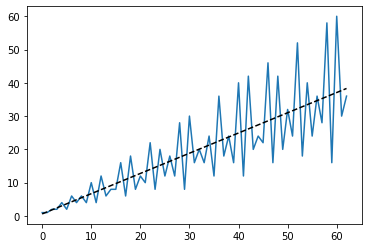

In [6]:
plt.plot(np.vectorize(totient)(np.arange(1,64,dtype=int)))
plt.plot(6 * (np.arange(1,64,dtype=int)) / np.pi / np.pi,'k--')

In [59]:
remainder_approx = lambda kmin,l: 2*np.sqrt(kmin) * np.exp(-0.5 * kmin*l) / l  + np.sqrt(2*np.pi)*erfc(np.sqrt(0.5 * kmin * l)) / l**1.5
def fn(cmap,ksum_max = None):
    lmbda = cmap.lambda_const
    A = cmap.A_const
    kmax = cmap.kmax
    partial_sums = np.zeros(ksum_max)
    first_order_half_width_sq = 0    
    if not ksum_max:
        ksum_max = cmap.kmax
        
    for k_minus_1,ck in enumerate(cmap.ck):
        k = k_minus_1+1
        if k>1:
            half_width = np.sqrt(2 * ck / np.pi)
            partial_sums[k_minus_1] = 2*totient(k)*half_width
        if k%2:
            first_order_half_width_sq += (2/np.pi) * ck
    partial_sums[0] = 2*np.sqrt(first_order_half_width_sq)
    
    for k in np.arange(cmap.kmax+1,ksum_max+1):
        ck = A * np.exp(-lmbda * k) / k
        half_width = np.sqrt(2 * ck / np.pi)
        partial_sums[k-1] = 2 * totient(k) * half_width

    return partial_sums,np.sum(partial_sums[:kmax+1]) + remainder_approx(kmax-0.5,lmbda)

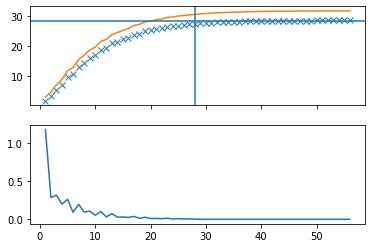

In [60]:
fig,ax = plt.subplots(2,1,sharex=True)
partial_sums,estimate = fn(cmap,2 * cmap.kmax)
kvals = np.arange(1,2*cmap.kmax + 1)
partials_approx = 2*np.sqrt(2 * ck_fn(kvals) / np.pi) * np.vectorize(totient)(kvals)

ax[0].plot(kvals,np.cumsum(partial_sums),'x')
ax[0].plot(kvals,np.cumsum(partials_approx))
ax[0].axvline(cmap.kmax)
ax[0].axhline(estimate)

ax[1].plot(kvals,partials_approx-partial_sums)

In [47]:
del polylog_approx


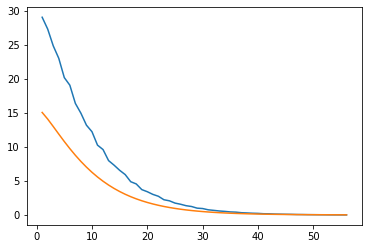

In [50]:
remainder=np.sum(partials_approx)-np.cumsum(partials_approx)
plt.plot(kvals,remainder)
r_approx = remainder_approx(kvals,cmap.lambda_const)
plt.plot(kvals,r_approx)

(0.01, 0.9123435569745284)

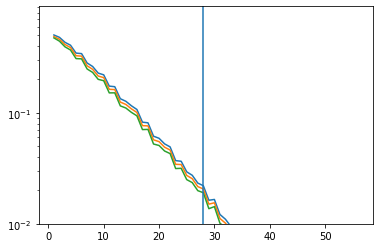

In [58]:
plt.plot(kvals,(remainder - remainder_approx(kvals+0.5,cmap.lambda_const))/np.sum(partial_sums))
plt.plot(kvals,(remainder - remainder_approx(kvals,cmap.lambda_const))/np.sum(partial_sums))
plt.plot(kvals,(remainder - remainder_approx(kvals-0.5,cmap.lambda_const))/np.sum(partial_sums))
plt.axvline(cmap.kmax)
plt.yscale('log')
plt.ylim(ymin=1e-2)

In [31]:
partials_approx-partial_sums

array([1.17256143, 0.28340576, 0.31545827, 0.1967542 , 0.26192393,
       0.09095011, 0.19527135, 0.09528548, 0.10646226, 0.0536134 ,
       0.1024191 , 0.0316074 , 0.07375784, 0.02888892, 0.03035853,
       0.02405614, 0.03830615, 0.01148568, 0.02765607, 0.00989956,
       0.01199699, 0.00810016, 0.01447613, 0.00428645, 0.00874534,
       0.00429098, 0.00527354, 0.00288558, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])